# 21BAI1133 - Mukundh J

# Naive Bayes - ML Lab assignment 6

# Q1. Play Cricket 
Suppose you want to build Naïve Bayes classifier for predicting whether a cricket match will be played in the given weather conditions or not. Here the weather conditions are described by features outlook, temperature, humidity and wind. The target is play with two class labels Yes and No.  (Dataset:  play.csv)


a.Implement Naïve Bayes classifier which must
i]Print the class prior probabilities form the training set
ii]Classify the test sample  <Rain, Cool, High>. Need to print likelihood for  <Rain, Cool, High>  and also class conditional probabilities for “YES” and “NO” classes. 

b.Use sklearn CategoricalNB to validate the results obtained above.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('play.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
X = df.iloc[:,1:-1]
y = df['play']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [5]:
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = {}
        self.feature_probabilities = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    def fit(self, X, y):
        self.class_probabilities = defaultdict(int)

        # Count the occurrences of each class
        for class_label in y:
            self.class_probabilities[class_label] += 1

        # Calculate class probabilities
        num_samples = len(y)
        for class_label, count in self.class_probabilities.items():
            self.class_probabilities[class_label] = count / num_samples

        # Count the occurrences of features for each class
        for i in range(len(X)):
            features = X[i]
            class_label = y[i]

            for feature_index, value in enumerate(features):
                self.feature_probabilities[feature_index][class_label][value] += 1

        # Calculate the feature probabilities with Laplace smoothing
        num_features = len(self.feature_probabilities)
        for feature_index in range(num_features):
            for class_label in self.class_probabilities.keys():
                total_count = sum(self.feature_probabilities[feature_index][class_label].values())
                num_unique_values = len(self.feature_probabilities[feature_index][class_label])

                for value in self.feature_probabilities[feature_index][class_label]:
                    self.feature_probabilities[feature_index][class_label][value] = \
                        (self.feature_probabilities[feature_index][class_label][value] + 1) / (total_count + num_unique_values)

    def predict(self, X):
        predictions = []

        for features in X:
            max_probability = float('-inf')
            predicted_class = None

            for class_label in self.class_probabilities.keys():
                probability = np.log(self.class_probabilities[class_label])

                for feature_index, value in enumerate(features):
                    # Handle unseen values with Laplace smoothing
                    smoothed_prob = self.feature_probabilities[feature_index][class_label].get(value, 1 / len(self.class_probabilities))
                    probability += np.log(smoothed_prob)

                if probability > max_probability:
                    max_probability = probability
                    predicted_class = class_label

            predictions.append(predicted_class)

        return predictions


In [6]:
nb = NaiveBayesClassifier()
nb.fit(X_train, y_train)

In [7]:
y_pred = nb.predict(X_test)

In [8]:
y_pred

['Yes', 'No', 'No', 'Yes']

In [9]:
y_test

array(['Yes', 'Yes', 'No', 'Yes'], dtype=object)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

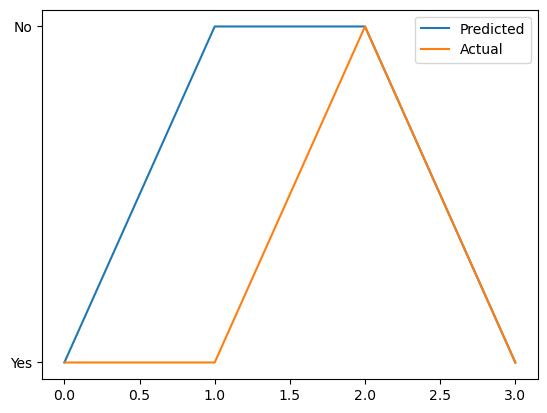

In [11]:
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

A deviation has occured in the classification of the second set of data

# a

In [12]:
print(nb.predict([['Rain','Cool','High','Weak']]))

['Yes']


In [13]:
print(nb.predict([['Rain','Cool','High','Strong']]))

['No']


therefore the prediction for <Rain, Cool, High>:
at wind =Weak ==> 'Yes';
at wind =Strong ==>'No'

# b

In [14]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
X = df.iloc[:,1:-1]
y = df['play']

In [16]:
X

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [17]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: play, dtype: object

In [18]:
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

In [19]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [20]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

i.e. 1==>'Yes', 0==>'No'

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = CategoricalNB()

In [22]:
model.fit(X_train, y_train)

CategoricalNB()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1])

In [24]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

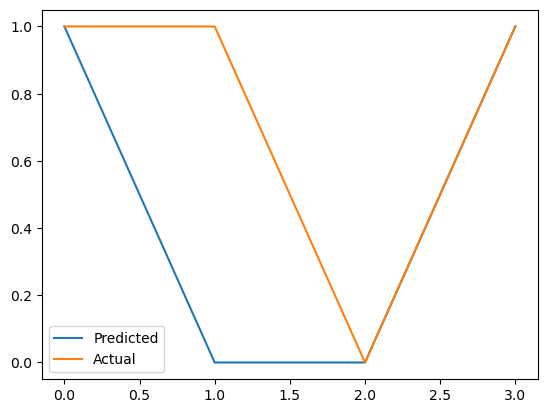

In [25]:
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.show()

In [26]:
data = pd.DataFrame([['Rain','Cool','High','Weak'],['Rain','Cool','High','Strong']])

In [27]:
encoded = onehot_encoder.transform(data)

/Users/mukundhjayapal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [28]:
encoded

array([[0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 1., 0.]])

In [29]:
pred = model.predict(encoded)

In [30]:
pred

array([1, 0])

therefore even in this case the prediction for <Rain, Cool, High>:
at wind =Weak ==> 'Yes';
at wind =Strong ==>'No'

# Q2. Music Emotion Recognition
Assume you need to build a classifier for recognizing emotional content in music signals such as Mel Frequency Cepstral Coefficients (MFCCs), Tempo, Chromagram, Spectral and Harmonic features. There are four different classes of music emotions in the dataset: happy, sad, angry, and relax. (Dataset:  music.csv)
Choose a suitable Naïve Bayes classifier model from Sklearn to perform the above task.
Need to show all the pre-processing steps (normalization, encoding etc)
Report accuracy

In [31]:
df = pd.read_csv('music.csv')
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [32]:
df.columns

Index(['Class', '_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12

In [33]:
X = df.iloc[:, 1:]
y = df.iloc[:,0]

In [34]:
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.675

In [38]:
y_test

209      sad
280      sad
33     relax
210      sad
93     relax
       ...  
246      sad
227      sad
369    angry
176    happy
289      sad
Name: Class, Length: 80, dtype: object

In [39]:
y_pred

array(['happy', 'sad', 'relax', 'sad', 'relax', 'relax', 'sad', 'sad',
       'sad', 'happy', 'sad', 'angry', 'relax', 'relax', 'happy', 'angry',
       'angry', 'angry', 'sad', 'angry', 'sad', 'relax', 'happy', 'angry',
       'relax', 'angry', 'happy', 'sad', 'angry', 'happy', 'angry',
       'happy', 'relax', 'relax', 'relax', 'happy', 'happy', 'angry',
       'happy', 'happy', 'angry', 'relax', 'relax', 'relax', 'relax',
       'angry', 'happy', 'happy', 'relax', 'happy', 'relax', 'happy',
       'happy', 'relax', 'angry', 'relax', 'relax', 'sad', 'relax',
       'happy', 'angry', 'happy', 'happy', 'relax', 'happy', 'relax',
       'happy', 'sad', 'happy', 'relax', 'relax', 'happy', 'sad', 'relax',
       'angry', 'angry', 'happy', 'angry', 'happy', 'relax'], dtype='<U5')

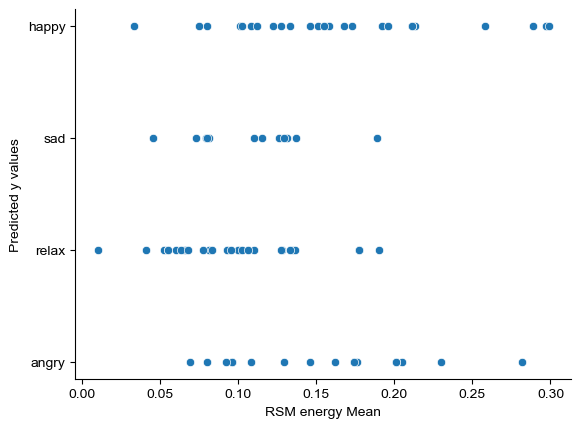

In [40]:
sns.scatterplot(x=X_test['_RMSenergy_Mean'], y=y_pred)
sns.set_style('whitegrid')
sns.despine()
plt.xlabel('RSM energy Mean')
plt.ylabel('Predicted y values')
plt.show()

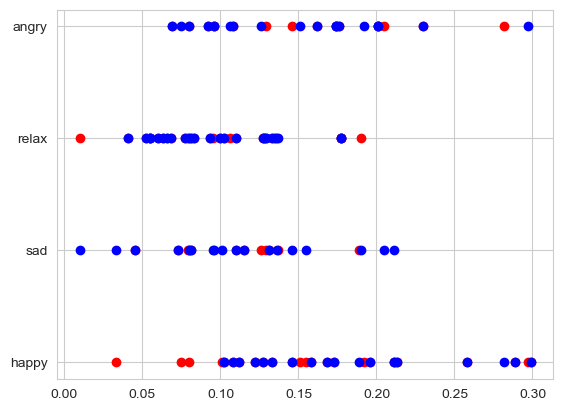

In [41]:
plt.scatter(X_test['_RMSenergy_Mean'],y_pred,color='red')
plt.scatter(X_test['_RMSenergy_Mean'],y_test,color='blue')

the above figure shows the deviations in predicted and actual values for different RMS energy values